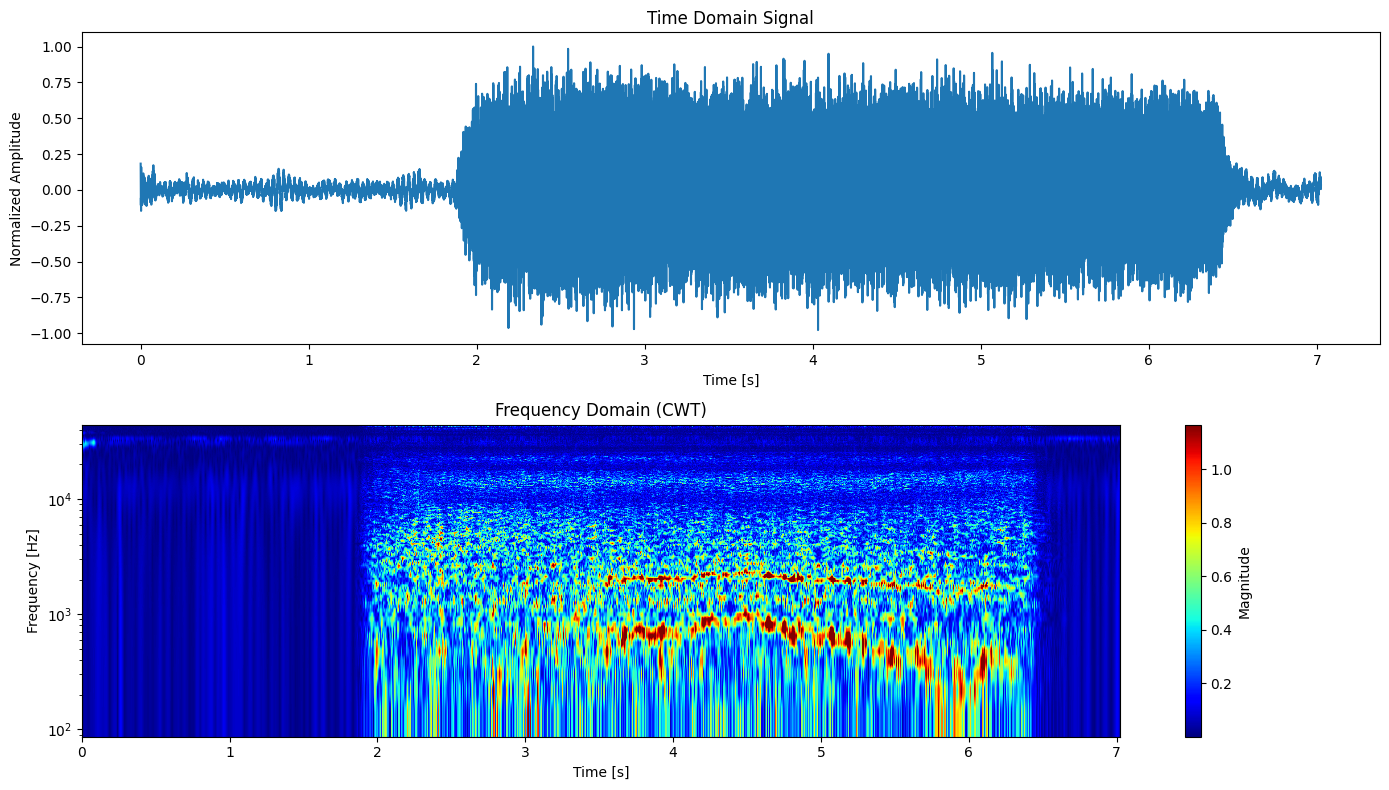

In [14]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
from scipy.io.wavfile import WavFileWarning

# Suppress WavFileWarning
warnings.filterwarnings("ignore", category=WavFileWarning)

# Step 1: Load WAV file
file_path = '/Users/maxfollett/Desktop/MixPre-107u.WAV'  
rate, data = wavfile.read(file_path)

# If the file has two channels (stereo)
if len(data.shape) > 1:
    data = data[:, 0]

# Normalize the data to the range [-1, 1] (only if max_val is not 0)
max_val = np.max(np.abs(data))
if max_val != 0:
    data = data / max_val

# Step 2: Time vector
time = np.arange(0, len(data)) / rate

# Step 3: Perform Continuous Wavelet Transform (CWT)
wavelet = 'cmor3.0-1.0'  # Specifying the bandwidth and center frequency
scales = np.arange(1, 512)  # Range of scales for CWT

# Perform the CWT to get coefficients and frequencies
coefficients, frequencies = pywt.cwt(data, scales, wavelet, sampling_period=1/rate)

# Step 4: Plotting the results
plt.figure(figsize=(14, 8))

# Time-domain signal
plt.subplot(2, 1, 1)
plt.plot(time, data)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Normalized Amplitude')

# Time-frequency analysis using Wavelet Transform
plt.subplot(2, 1, 2)
plt.imshow(np.abs(coefficients), extent=[time.min(), time.max(), frequencies.min(), frequencies.max()],
           cmap='jet', aspect='auto', vmax=np.max(np.abs(coefficients)) * 0.5)
plt.title('Frequency Domain (CWT)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.yscale('log')
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()